In [5]:
import pandas as pd


In [6]:
# Replace the file path with the correct path to your dataset
data = pd.read_csv(r"C:\Users\atand\Downloads\BostonHousing.csv")


In [7]:
# Replace the file path with the correct path to your dataset
data = pd.read_csv(r"C:\Users\atand\Downloads\BostonHousing.csv")


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\atand\Downloads\BostonHousing.csv")

# Check the column names
print(df.columns)

# Add a new attribute: RoomPerPerson
# Use the correct column names 'RM' and 'ZN'
if 'RM' in df.columns and 'ZN' in df.columns:
    df['RoomPerPerson'] = df['RM'] / (df['ZN'] + 1)  # Adding 1 to avoid division by zero
else:
    print("Columns 'RM' or 'ZN' not found in the DataFrame.")

# Display the first few rows of the updated DataFrame
print(df.head())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  RoomPerPerson  
0   4.98  24.0          0       0.346053  
1   9.14  21.6          0       6.421000  
2   4.03  34.7          1       7.185000  
3   2.94  33.4          1       6.998000  
4   5.33  36.2          1       7.147000  


In [12]:
# Removing outliers using Z-score
from scipy.stats import zscore

z_scores = data.select_dtypes(include=['float64', 'int64']).apply(zscore)
data = data[(z_scores < 3).all(axis=1)]  # Keep rows where Z-scores < 3


In [13]:
# Remove duplicates
data = data.drop_duplicates()


In [14]:
# Fill missing values with the column mean
data = data.fillna(data.mean())


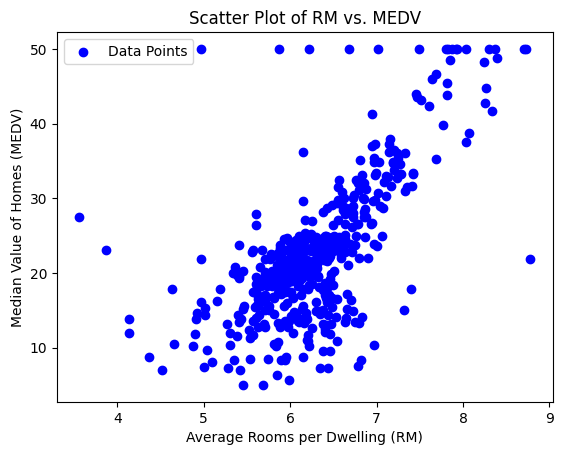

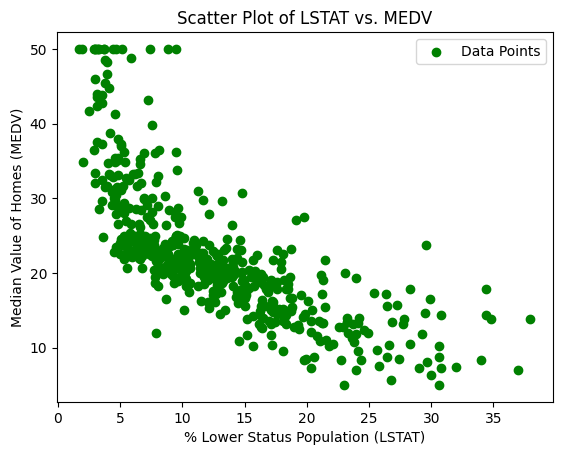

In [16]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Plot RM (rooms per dwelling) vs. MEDV (median value of homes)
plt.scatter(df['RM'], df['MEDV'], c='blue', label='Data Points')
plt.xlabel('Average Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Scatter Plot of RM vs. MEDV')
plt.legend()
plt.show()

# Plot LSTAT (lower status percentage) vs. MEDV
plt.scatter(df['LSTAT'], df['MEDV'], c='green', label='Data Points')
plt.xlabel('% Lower Status Population (LSTAT)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Scatter Plot of LSTAT vs. MEDV')
plt.legend()
plt.show()

In [17]:
from sklearn.cluster import KMeans


In [19]:
# Select relevant features
X = df[['RM', 'LSTAT', 'MEDV']]

In [20]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\atand\Downloads\BostonHousing.csv")

# Check the column names
print(df.columns)

# Select relevant features
X = df[['RM', 'LSTAT', 'MEDV']]

# Display the selected features
print(X.head())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')
      RM  LSTAT  MEDV
0  6.575   4.98  24.0
1  6.421   9.14  21.6
2  7.185   4.03  34.7
3  6.998   2.94  33.4
4  7.147   5.33  36.2


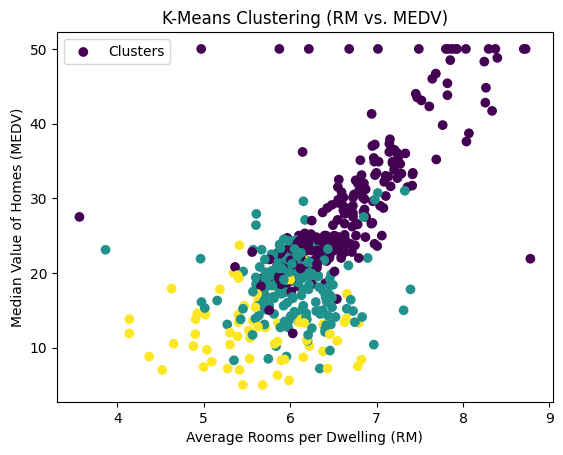

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv(r"C:\Users\atand\Downloads\BostonHousing.csv")

# Select relevant features
X = df[['RM', 'LSTAT']]  # Use only RM and LSTAT for clustering

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize Clusters
plt.scatter(df['RM'], df['MEDV'], c=df['Cluster'], cmap='viridis', label='Clusters')
plt.xlabel('Average Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('K-Means Clustering (RM vs. MEDV)')
plt.legend()
plt.show()

In [23]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[ 6.64934959  6.8953252 ]
 [ 6.04401563 15.22890625]
 [ 5.64461765 26.20955882]]


Cluster Centers:
[[ 6.64934959  6.8953252 ]
 [ 6.04401563 15.22890625]
 [ 5.64461765 26.20955882]]
Data with Cluster Labels:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  CAT. MEDV  Cluster  
0   4.98  24.0          0        0  
1   9.14  21.6          0        0  
2   4.03  34.7          1        0  
3   2.94  33.4          1        0  
4   5.33  36.2          1        0  


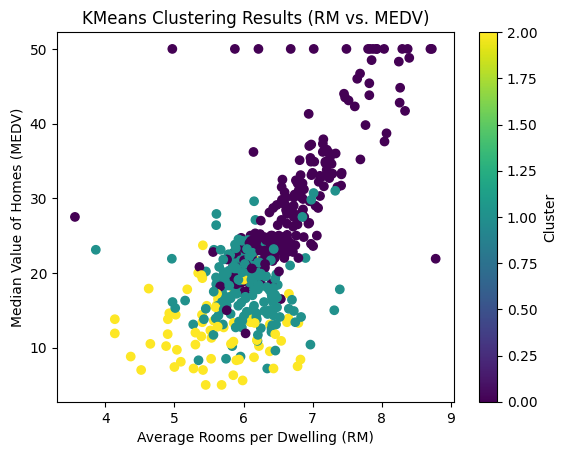

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv(r"C:\Users\atand\Downloads\BostonHousing.csv")

# Select relevant features
X = df[['RM', 'LSTAT']]  # Use only RM and LSTAT for clustering

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Display cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Display first few rows with cluster labels
print("Data with Cluster Labels:")
print(df.head())

# Visualize clusters
plt.scatter(df['RM'], df['MEDV'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Average Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('KMeans Clustering Results (RM vs. MEDV)')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Выводы
#Ключевые выводы:
#Стоимость дома (MEDV) положительно коррелирует с количеством комнат (RM) и отрицательно - с долей населения с более низким статусом (LSTAT).
#Набор данных образует три отдельных кластера, представляющих различные профили соседей.
#Применение:
#Эти кластеры могут быть использованы для группировки районов в рамках целевой жилищной политики или маркетинговых стратегий.
#На основе этих данных можно разработать модели прогнозирования для классификации районов.